In [1]:
# Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('Student_Dropout_Data2.csv')

In [3]:
df.head()

,Age,Gender,Family_Size,Parental_Education,Parent_Occupation,Overall_GPA,Overall_GPA.1,Participation_Extracurricular,School_Type,School_Attendance_Policy,...,Peer_Support,Location,Dropout,Boarding_Status,Technology_Access,Socioeconomic_Status,Teacher_Student_Ratio,School_Infrastructure_Score,Average_Class_Size,Average_Performance
0,17,Male,4,Primary,Informal Sector,62.210390,62.210390,No,Single-Sex,Strict,...,Yes,Rural,False,Day-school,High,Middle,21.516851,89.025437,35.506157,62.210390
1,18,Male,6,Tertiary,Formal Sector,61.838993,61.838993,Yes,Mixed,Moderate,...,No,Rural,False,Day-school,Medium,Low,24.433649,31.354119,38.799322,61.838993
2,16,Female,3,Secondary,Informal Sector,70.235653,70.235653,No,Mixed,Lenient,...,No,Urban,False,Day-school,Medium,Low,28.240244,28.424973,40.632662,70.235653
3,18,Female,3,Secondary,Formal Sector,73.847675,73.847675,No,Mixed,Moderate,...,Yes,Urban,False,Day-school,Medium,Middle,22.998542,77.266849,34.851073,73.847675
4,18,Male,8,Primary,Formal Sector,68.016078,68.016078,No,Mixed,Strict,...,Yes,Rural,True,Boarding,Medium,Low,19.377884,99.842347,46.116631,68.016078


In [4]:
#Checking Data Types
print(df.dtypes)

Age                                int64
Gender                            object
Family_Size                        int64
Parental_Education                object
Parent_Occupation                 object
Overall_GPA                      float64
Overall_GPA.1                    float64
Participation_Extracurricular     object
School_Type                       object
School_Attendance_Policy          object
Mental_Health_Status              object
Peer_Support                      object
Location                          object
Dropout                             bool
Boarding_Status                   object
Technology_Access                 object
Socioeconomic_Status              object
Teacher_Student_Ratio            float64
School_Infrastructure_Score      float64
Average_Class_Size               float64
Average_Performance              float64
dtype: object


In [5]:
#Summary Statistics
df.describe()

,Age,Family_Size,Overall_GPA,Overall_GPA.1,Teacher_Student_Ratio,School_Infrastructure_Score,Average_Class_Size,Average_Performance
count,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000
mean,16.499750,5.028431,65.174860,65.174860,19.974001,66.794521,37.924105,65.174860
std,1.709161,1.989256,8.474702,8.474702,4.809762,16.391500,5.486139,8.474702
min,14.000000,2.000000,33.659652,33.659652,10.000000,15.447630,20.000000,33.659652
25%,15.000000,3.000000,59.415995,59.415995,16.561381,55.409763,34.178643,59.415995
50%,17.000000,5.000000,65.232025,65.232025,19.927626,66.587002,37.978314,65.232025
75%,18.000000,7.000000,70.902536,70.902536,23.343779,78.260045,41.763575,70.902536
max,19.000000,8.000000,93.861896,93.861896,30.000000,100.000000,50.000000,93.861896


**Univariate Analysi**s

a. Target Variable (Dropout)

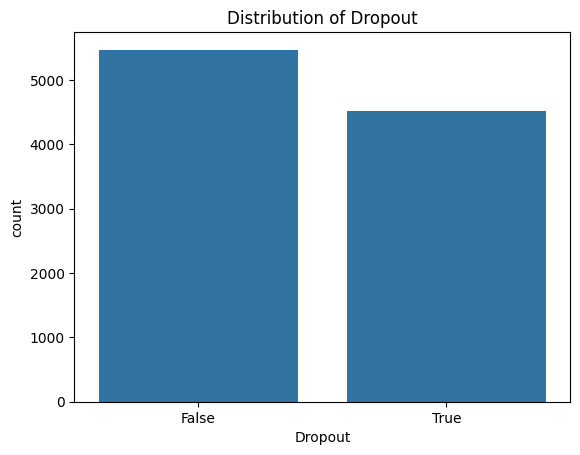

In [6]:
sns.countplot(x='Dropout', data=df)
plt.title('Distribution of Dropout')
plt.show()

In [7]:
dropout_counts = df['Dropout'].value_counts()
print(dropout_counts)


Dropout
False    5471
True     4518
Name: count, dtype: int64


b. Numerical Variables  
Histograms:

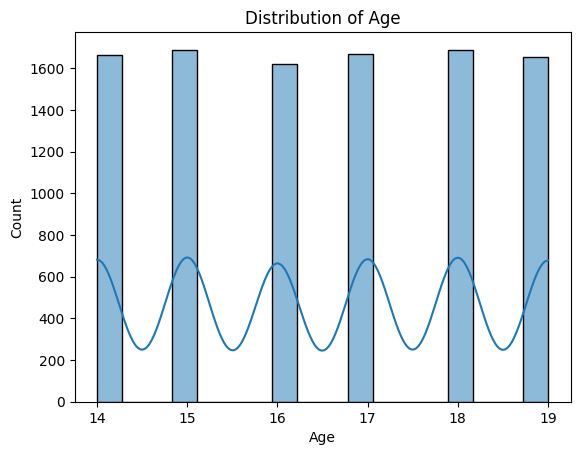

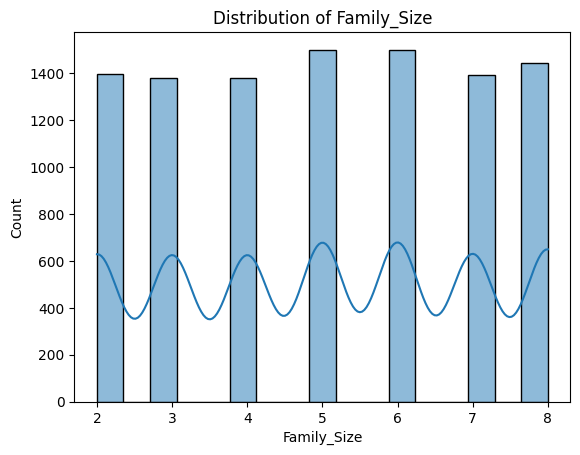

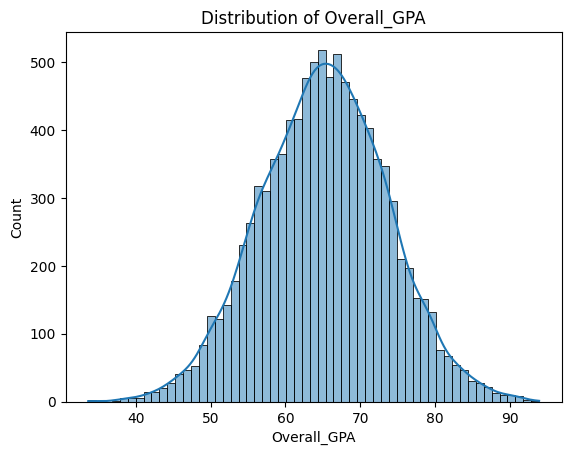

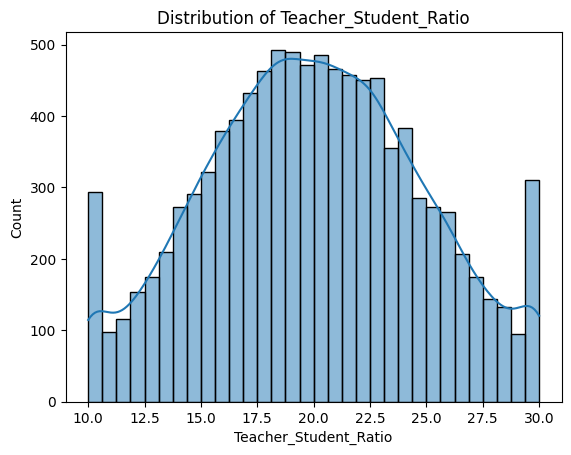

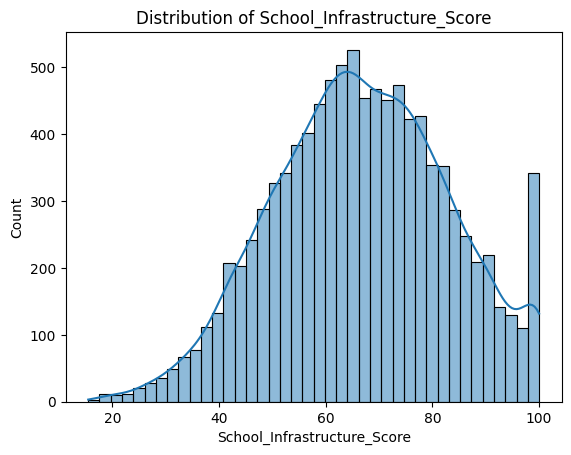

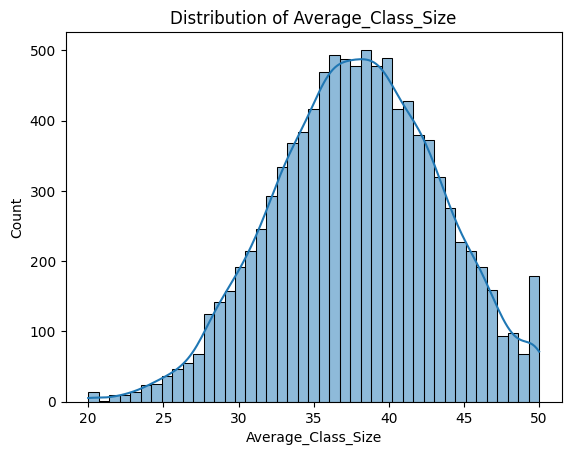

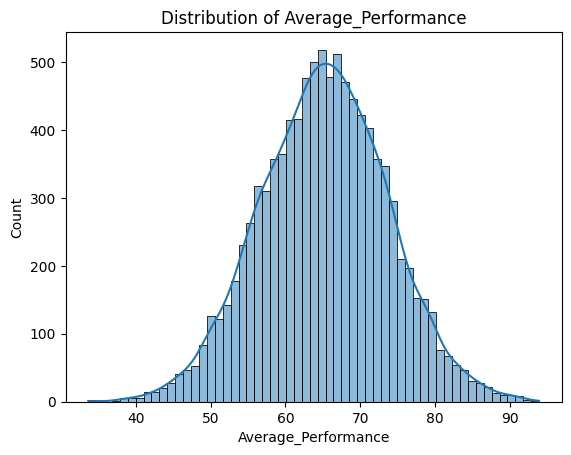

In [8]:
numerical_cols = ['Age', 'Family_Size', 'Overall_GPA', 'Teacher_Student_Ratio', 'School_Infrastructure_Score', 'Average_Class_Size', 'Average_Performance']
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

c. Categorical Variable  
Count Plots:

<ipython-input-9-64069d24761a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')  # Use a color palette


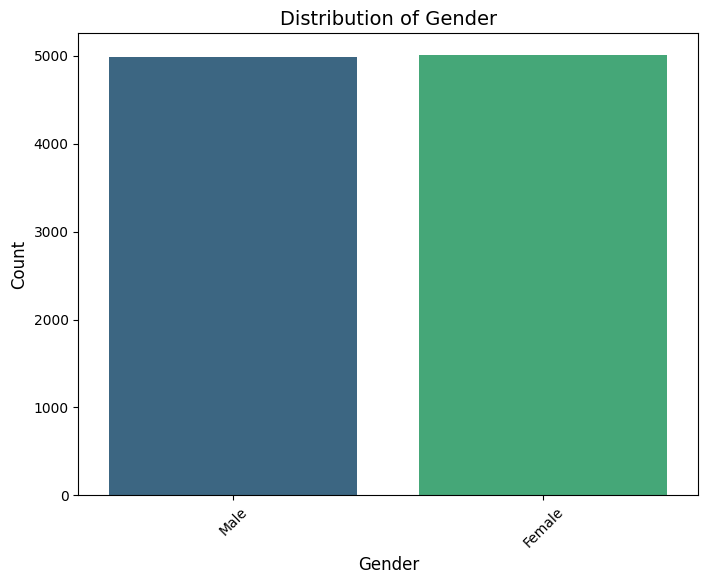

<ipython-input-9-64069d24761a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')  # Use a color palette


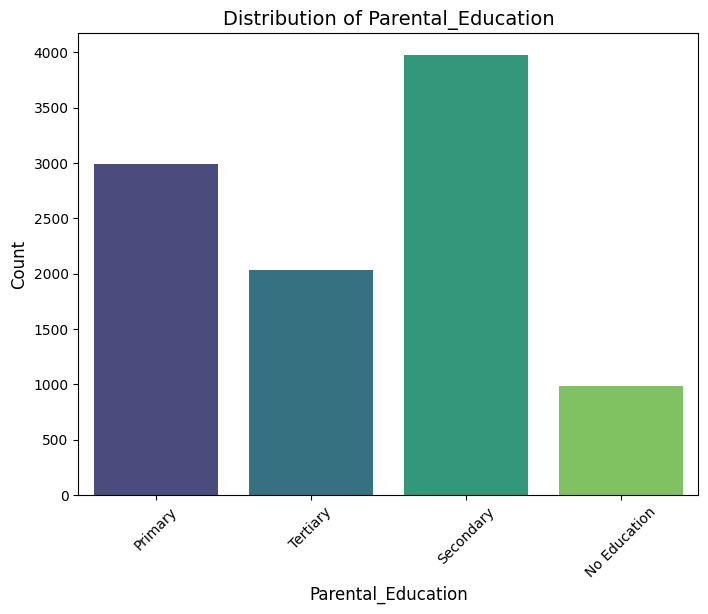

<ipython-input-9-64069d24761a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')  # Use a color palette


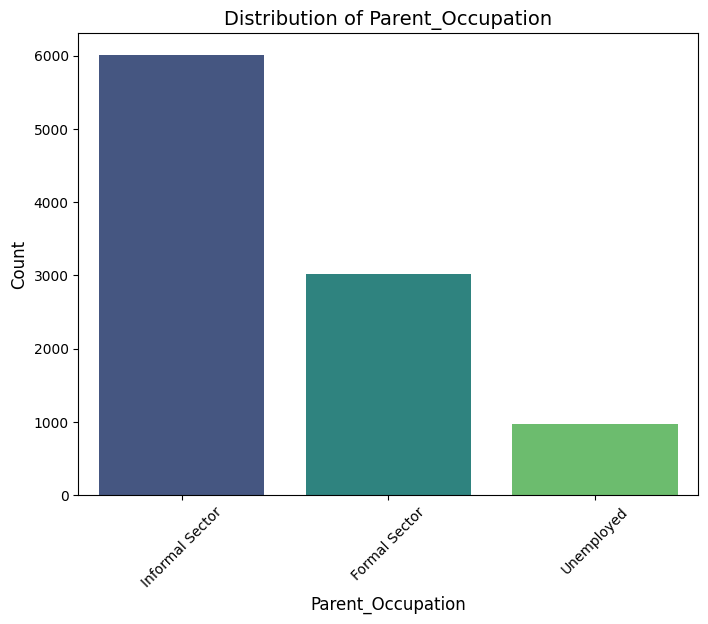

<ipython-input-9-64069d24761a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')  # Use a color palette


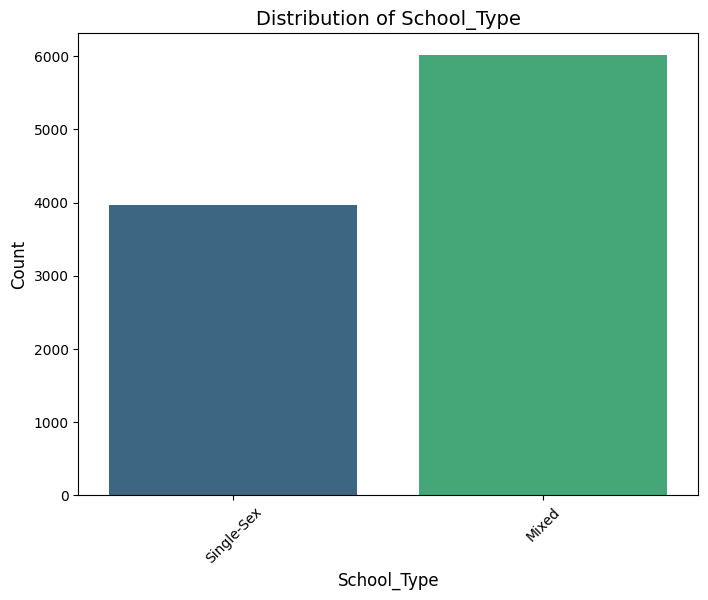

<ipython-input-9-64069d24761a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')  # Use a color palette


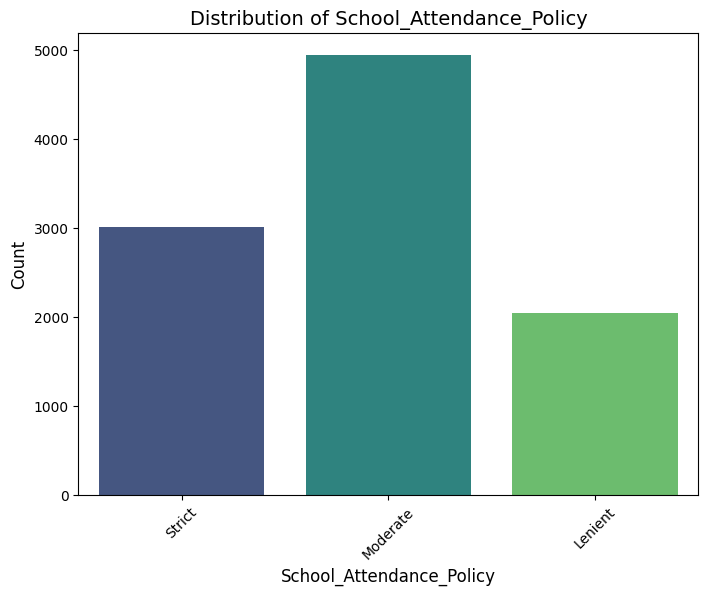

<ipython-input-9-64069d24761a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')  # Use a color palette


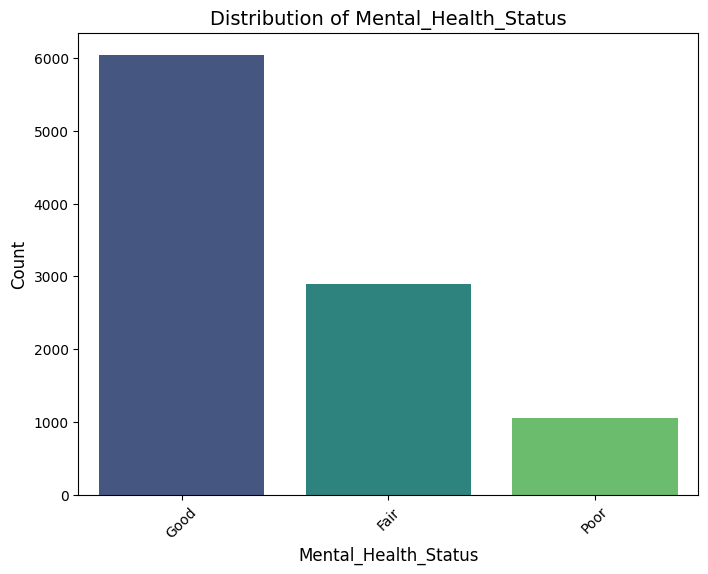

<ipython-input-9-64069d24761a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')  # Use a color palette


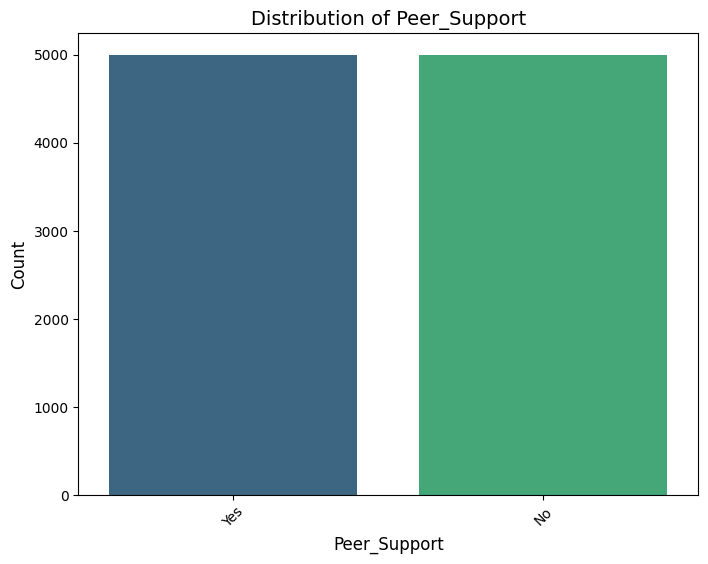

<ipython-input-9-64069d24761a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')  # Use a color palette


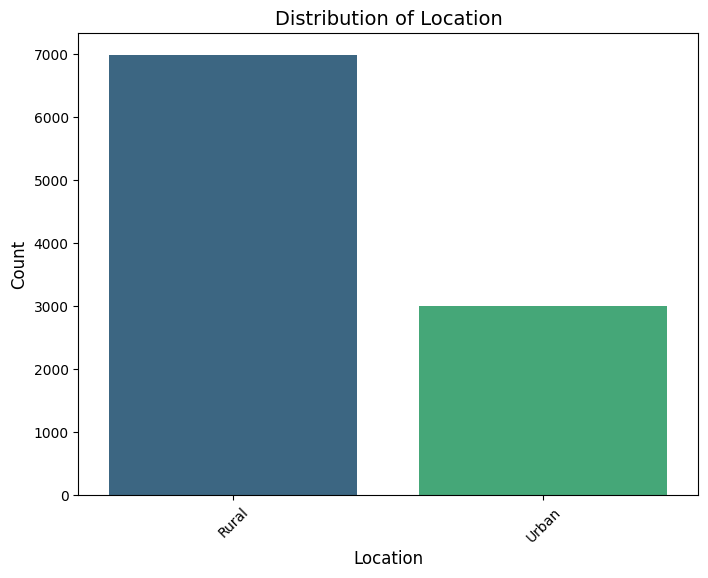

<ipython-input-9-64069d24761a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')  # Use a color palette


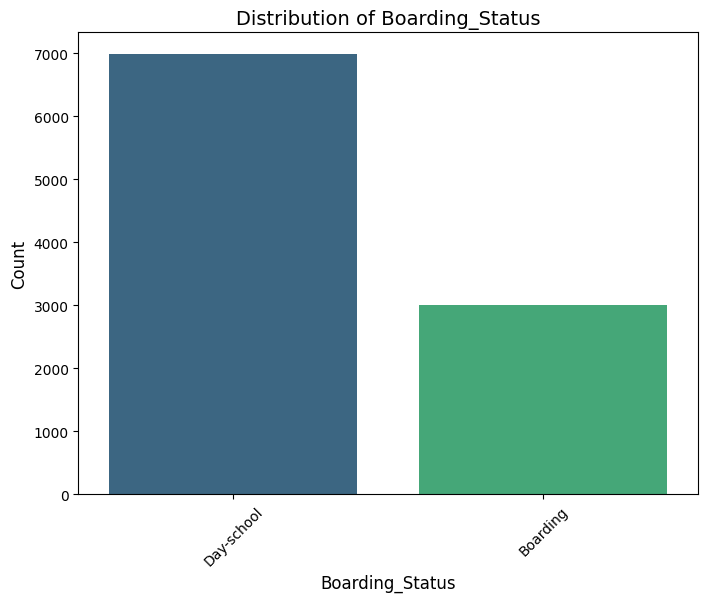

<ipython-input-9-64069d24761a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')  # Use a color palette


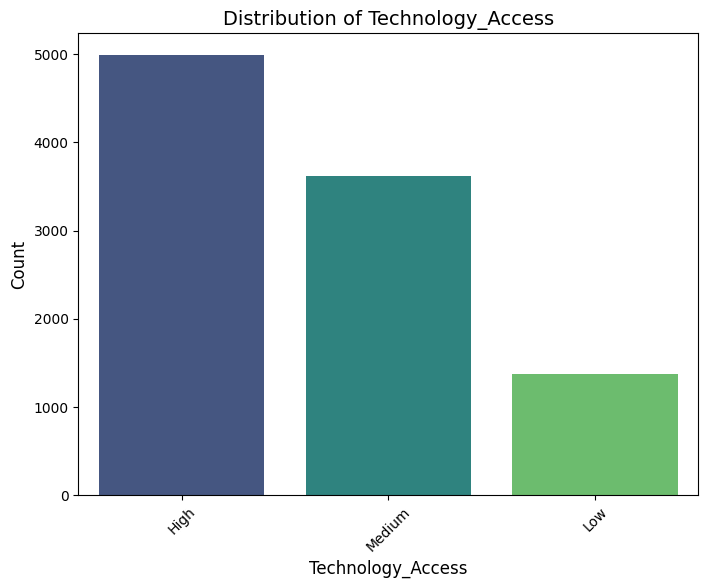

<ipython-input-9-64069d24761a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')  # Use a color palette


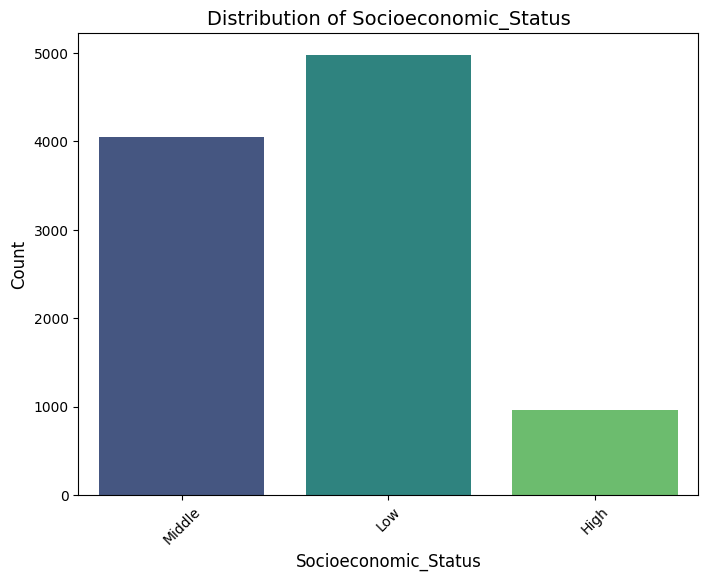

In [9]:
# List of categorical columns in your dataset
categorical_cols = [
    'Gender', 'Parental_Education', 'Parent_Occupation',
    'School_Type', 'School_Attendance_Policy',
    'Mental_Health_Status', 'Peer_Support', 'Location',
    'Boarding_Status', 'Technology_Access', 'Socioeconomic_Status'
]

# Plot count plots for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(8, 6))  # Set figure size
    sns.countplot(x=col, data=df, palette='viridis')  # Use a color palette
    plt.title(f'Distribution of {col}', fontsize=14)  # Add a title
    plt.xlabel(col, fontsize=12)  # Label for x-axis
    plt.ylabel('Count', fontsize=12)  # Label for y-axis
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

**Bivariate Analysis**  
Analyze relationships between variables and the target (Dropout).

a. Numerical Variables vs. Dropout  
Box Plots:

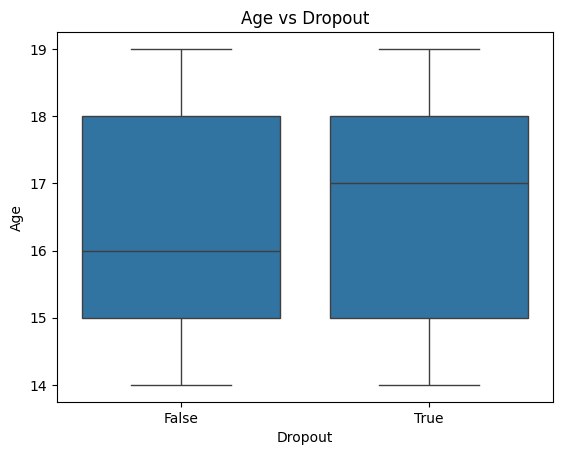

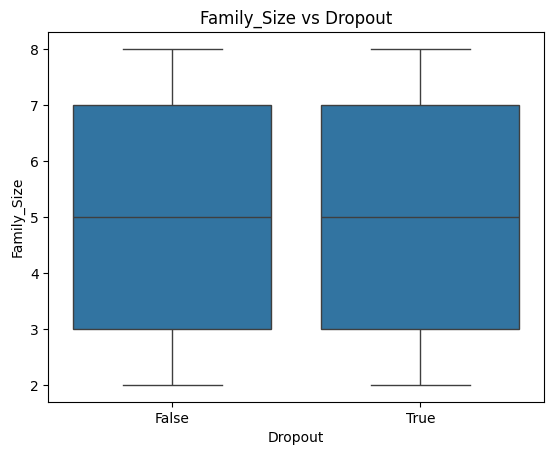

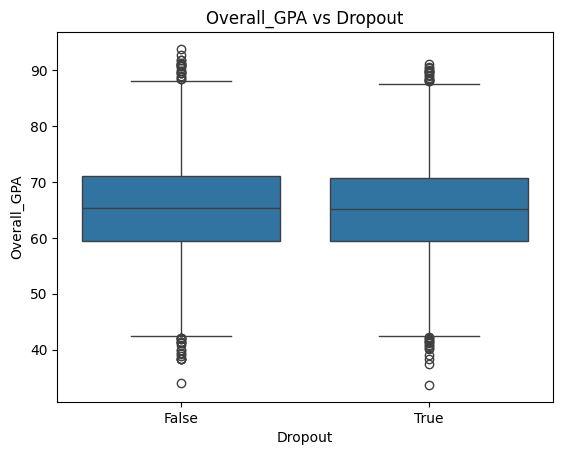

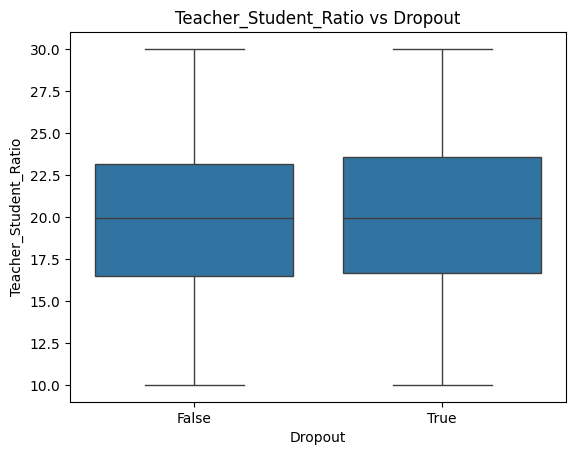

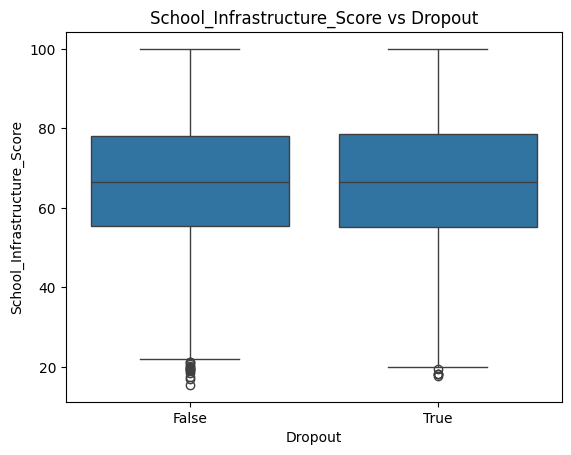

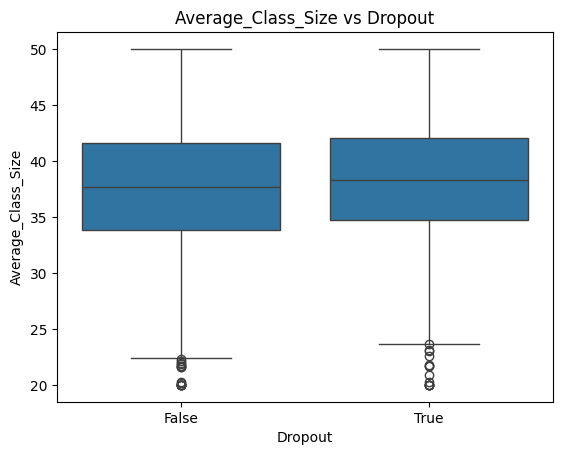

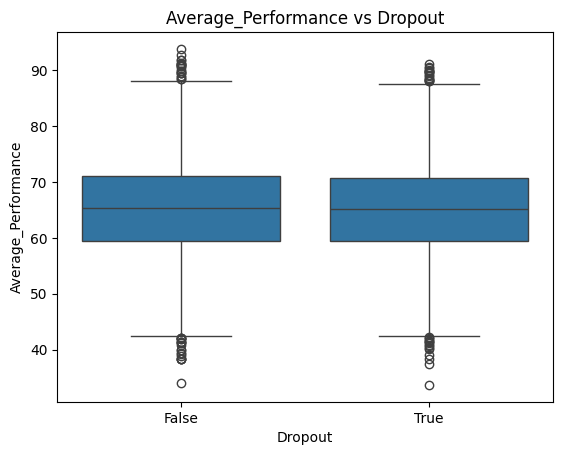

In [10]:
for col in numerical_cols:
    sns.boxplot(x='Dropout', y=col, data=df)
    plt.title(f'{col} vs Dropout')
    plt.show()

 b. Categorical Variables vs. Dropout  
 Grouped Bar Plots:

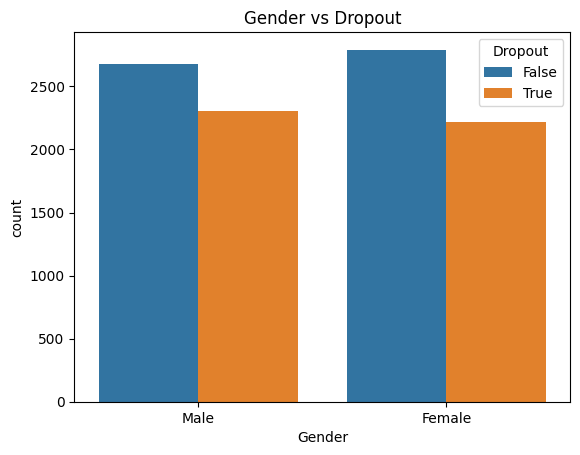

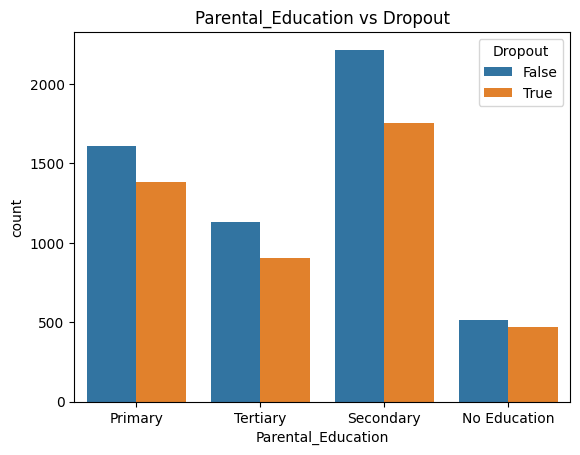

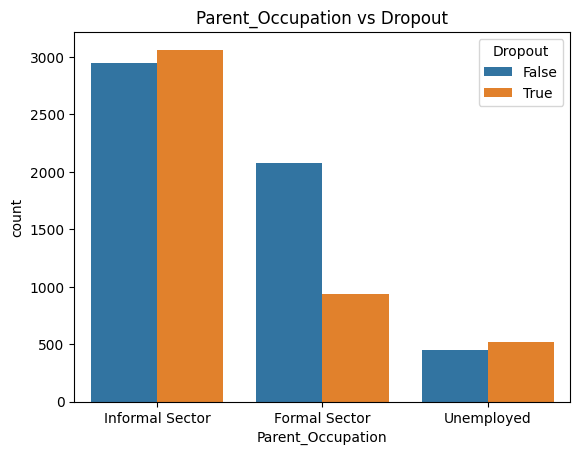

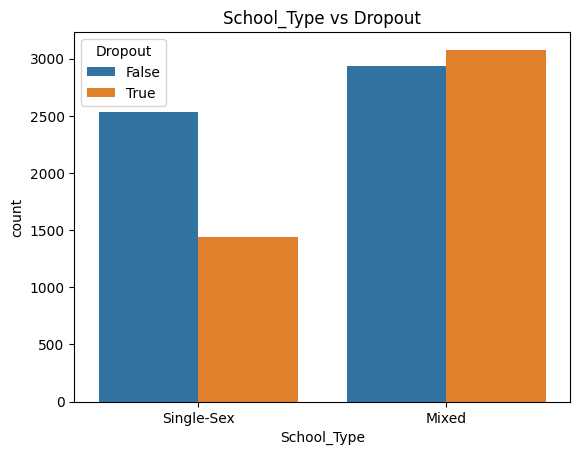

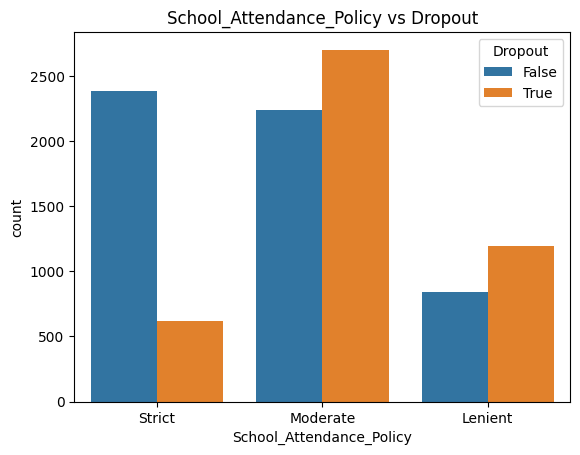

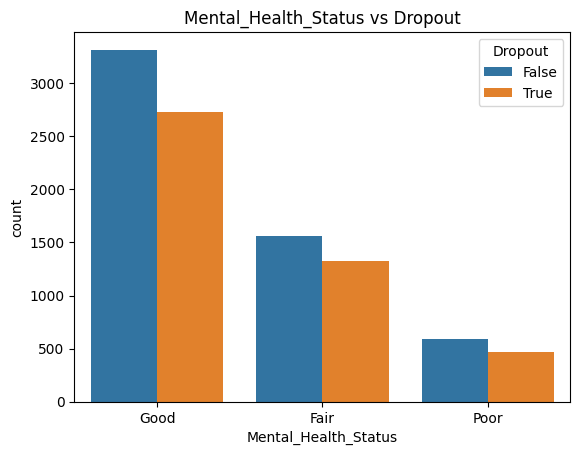

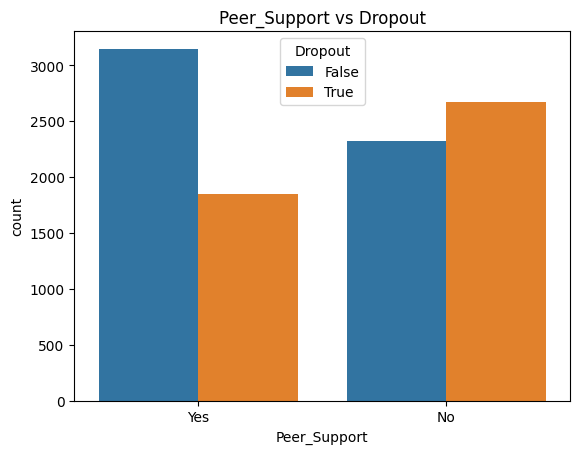

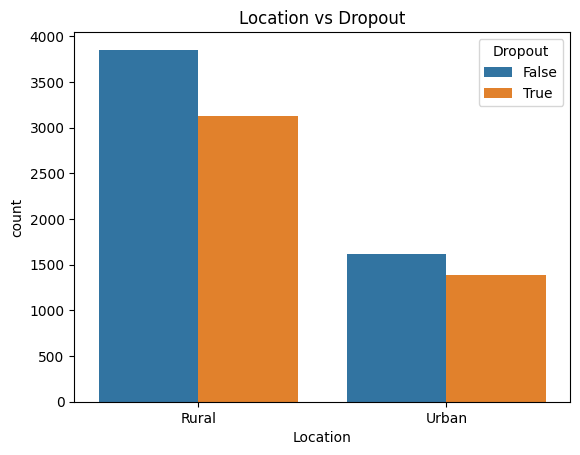

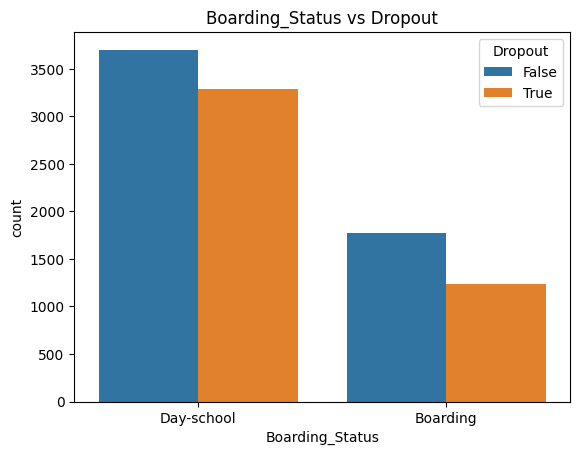

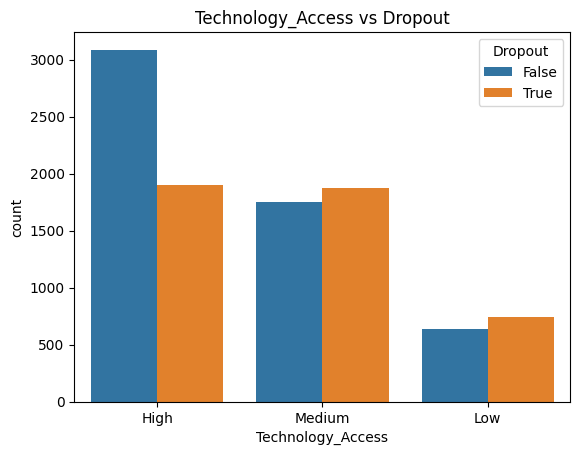

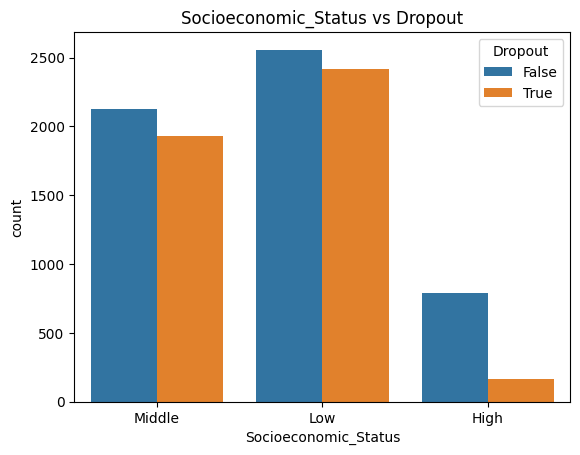

In [11]:
for col in categorical_cols:
    sns.countplot(x=col, hue='Dropout', data=df)
    plt.title(f'{col} vs Dropout')
    plt.show()

 **Correlation Analysis**  
Analyze relationships between numerical variables.

a. Correlation Matrix

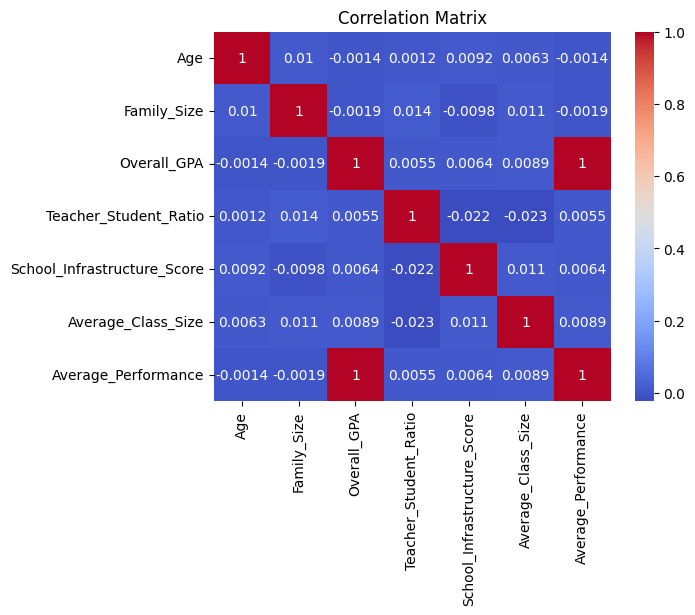

In [12]:
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
# List of categorical columns
categorical_cols = [
    'Gender', 'Parental_Education', 'Parent_Occupation',
    'School_Type', 'School_Attendance_Policy',
    'Mental_Health_Status', 'Peer_Support', 'Location',
    'Boarding_Status', 'Technology_Access', 'Socioeconomic_Status'
]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to binary/ordinal variables
binary_ordinal_cols = ['Gender', 'Peer_Support', 'Location', 'Boarding_Status']
for col in binary_ordinal_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Apply One-Hot Encoding to nominal variables
nominal_cols = ['Parental_Education', 'Parent_Occupation', 'School_Type',
                'School_Attendance_Policy', 'Mental_Health_Status',
                'Technology_Access', 'Socioeconomic_Status']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Verify the data
print(df.head())
print(df.dtypes)

   Age  Gender  Family_Size  Overall_GPA  Overall_GPA.1  \
0   17       1            4    62.210390      62.210390   
1   18       1            6    61.838993      61.838993   
2   16       0            3    70.235653      70.235653   
3   18       0            3    73.847675      73.847675   
4   18       1            8    68.016078      68.016078   

  Participation_Extracurricular  Peer_Support  Location  Dropout  \
0                            No             1         0    False   
1                           Yes             0         0    False   
2                            No             0         1    False   
3                            No             1         1    False   
4                            No             1         0     True   

   Boarding_Status  ...  Parent_Occupation_Unemployed  School_Type_Single-Sex  \
0                1  ...                         False                    True   
1                1  ...                         False                   Fa

In [14]:
# Convert all boolean columns to integers
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Converting 'Participation_Extracurricular' to numeric
df['Participation_Extracurricular'] = label_encoder.fit_transform(df['Participation_Extracurricular'])

In [16]:
# Converting 'Dropout' to integer
df['Dropout'] = df['Dropout'].astype(int)

In [17]:
print(df.dtypes)

Age                                    int64
Gender                                 int64
Family_Size                            int64
Overall_GPA                          float64
Overall_GPA.1                        float64
Participation_Extracurricular          int64
Peer_Support                           int64
Location                               int64
Dropout                                int64
Boarding_Status                        int64
Teacher_Student_Ratio                float64
School_Infrastructure_Score          float64
Average_Class_Size                   float64
Average_Performance                  float64
Parental_Education_Primary             int64
Parental_Education_Secondary           int64
Parental_Education_Tertiary            int64
Parent_Occupation_Informal Sector      int64
Parent_Occupation_Unemployed           int64
School_Type_Single-Sex                 int64
School_Attendance_Policy_Moderate      int64
School_Attendance_Policy_Strict        int64
Mental_Hea

b. Correlation with Target

In [18]:
corr_with_target = df.corr()['Dropout'].sort_values(ascending=False)
print(corr_with_target)

Dropout                              1.000000
School_Attendance_Policy_Moderate    0.188393
Parent_Occupation_Informal Sector    0.142210
Technology_Access_Medium             0.099064
Technology_Access_Low                0.069267
Socioeconomic_Status_Low             0.067769
Parent_Occupation_Unemployed         0.056527
Boarding_Status                      0.054451
Average_Class_Size                   0.052889
Socioeconomic_Status_Middle          0.039890
Gender                               0.019793
Teacher_Student_Ratio                0.016044
Parental_Education_Primary           0.013771
Location                             0.013129
Family_Size                          0.012291
Age                                  0.006724
School_Infrastructure_Score          0.000961
Mental_Health_Status_Good           -0.003349
Parental_Education_Tertiary         -0.007204
Mental_Health_Status_Poor           -0.007674
Overall_GPA.1                       -0.013914
Overall_GPA                       

**Feature Engineering**

a. Feature Creation

**Academic Performance Ratio:** Combine Overall_GPA and Attendance_Rate to create a new feature.

**Family Size Category:** Categorize Family_Size into small, medium, and large families.

In [19]:
df['Family_Size_Category'] = pd.cut(df['Family_Size'], bins=[0, 3, 5, 10], labels=['Small', 'Medium', 'Large'])

b. Feature Encoding

Encode the new categorical feature **(Family_Size_Category)** using one-hot encoding.

In [20]:
df = pd.get_dummies(df, columns=['Family_Size_Category'], drop_first=True)

c. Feature Scaling

Scale numerical features to ensure they are on the same scale.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Age', 'Family_Size', 'Overall_GPA', 'Teacher_Student_Ratio', 'School_Infrastructure_Score', 'Average_Class_Size', 'Average_Performance']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

**Split the Data**

In [22]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop('Dropout', axis=1)
y = df['Dropout']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model building**

1. Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model on the original training data
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)  # Predictions on the test set

In [40]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.73      1095
           1       0.68      0.61      0.65       903

    accuracy                           0.70      1998
   macro avg       0.69      0.69      0.69      1998
weighted avg       0.70      0.70      0.69      1998



In [41]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[840 255]
 [351 552]]


In [42]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.7575221104689089


**2.Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression

# Initialize the model with class weights
model_lr = LogisticRegression(random_state=42, class_weight='balanced')

In [44]:
# Train the model
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
# Evaluate the model
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
roc_auc_lr = roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1])
print("Logistic Regression - ROC-AUC Score:", roc_auc_lr)

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1095
           1       0.66      0.75      0.70       903

    accuracy                           0.71      1998
   macro avg       0.71      0.71      0.71      1998
weighted avg       0.72      0.71      0.71      1998

Logistic Regression - Confusion Matrix:
[[744 351]
 [227 676]]
Logistic Regression - ROC-AUC Score: 0.7938641868555854


**3.Support Vector Machine (SVM)**

In [46]:
from sklearn.svm import SVC

# Initialize the model with class weights
model_svm = SVC(random_state=42, class_weight='balanced', probability=True)

In [47]:
# Train the model
model_svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = model_svm.predict(X_test)

In [48]:
# Evaluate the model
print("SVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
roc_auc_svm = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
print("SVM - ROC-AUC Score:", roc_auc_svm)

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.58      0.65      1095
           1       0.59      0.75      0.66       903

    accuracy                           0.66      1998
   macro avg       0.67      0.66      0.66      1998
weighted avg       0.67      0.66      0.65      1998

SVM - Confusion Matrix:
[[631 464]
 [224 679]]
SVM - ROC-AUC Score: 0.7260258802469697


**Feature Importance**

In [49]:
# Assuming you have your trained RandomForestClassifier model named 'model'
importances = model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

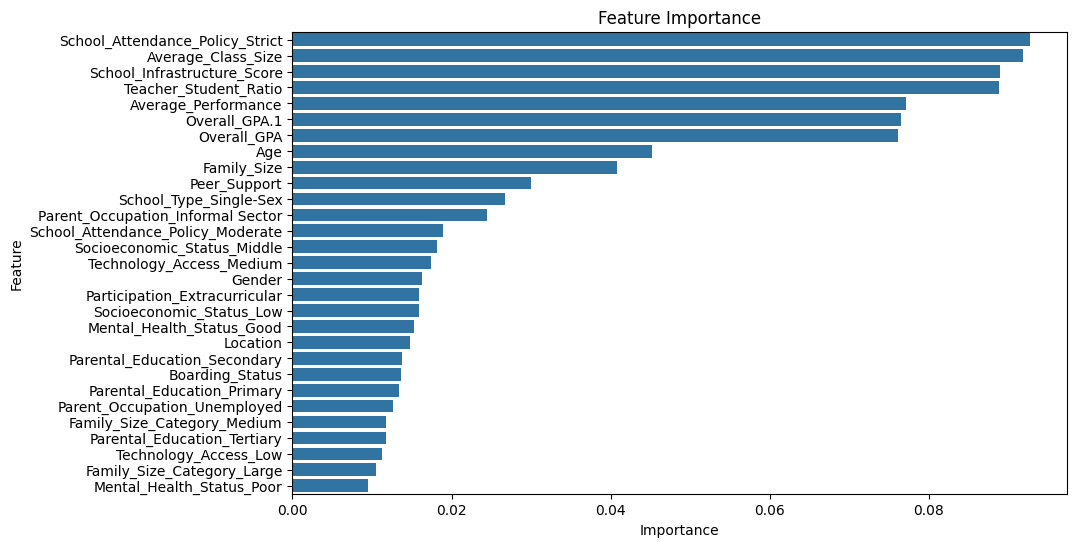

In [50]:
# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()